In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [85]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

### 1) Import Datasets

In [86]:
X_train = pd.read_csv('train_trans.csv')
y_train = X_train['FLAG']
X_val = pd.read_csv('val_trans.csv')
y_val = X_val['FLAG']
X_test = pd.read_csv('test_trans.csv')
y_test = X_test['FLAG']

In [87]:
X_train.drop(columns=['Unnamed: 0','FLAG'], inplace = True) # drop the first two columns
X_val.drop(columns=['Unnamed: 0','FLAG'], inplace = True)
X_test.drop(columns=['Unnamed: 0','FLAG'], inplace = True)

### 2) SVC with Gamma = 0.001 , Kernel = 'linear"

In [88]:
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [89]:
svc = SVC(gamma=0.001, kernel = 'linear')
svc.fit(X_train, y_train)

SVC(gamma=0.001, kernel='linear')

0.954533148584825
Threshold value is: 1


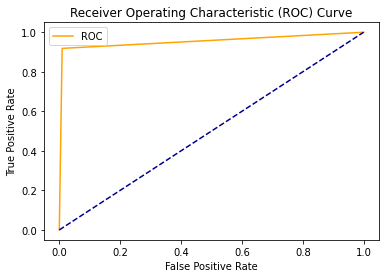

In [90]:
from sklearn.metrics import roc_auc_score,roc_curve

y_scores = svc.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
print(roc_auc_score(y_train, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

##### 2.1) Compare training and validation results

In [91]:
svc_train_pred = svc.predict(X_train)
print(classification_report(y_train, svc_train_pred))
svc_val_pred = svc.predict(X_val)
print(classification_report(y_val, svc_val_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6205
           1       0.97      0.92      0.94      1765

    accuracy                           0.97      7970
   macro avg       0.97      0.95      0.96      7970
weighted avg       0.97      0.97      0.97      7970

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       690
           1       0.96      0.93      0.94       196

    accuracy                           0.98       886
   macro avg       0.97      0.96      0.96       886
weighted avg       0.98      0.98      0.98       886



c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


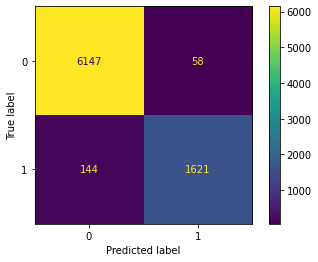

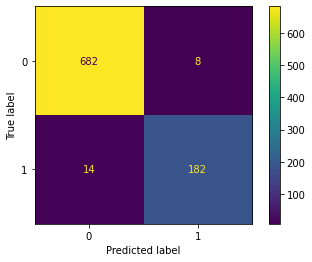

In [92]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svc, X_train, y_train)  # classification_report(y_train, svc_train_pred)
plot_confusion_matrix(svc, X_val, y_val) # confusion_matrix(y_val, svc_val_pred)

Text(0.5, 0, 'Feature Importance (Bottom 20)')

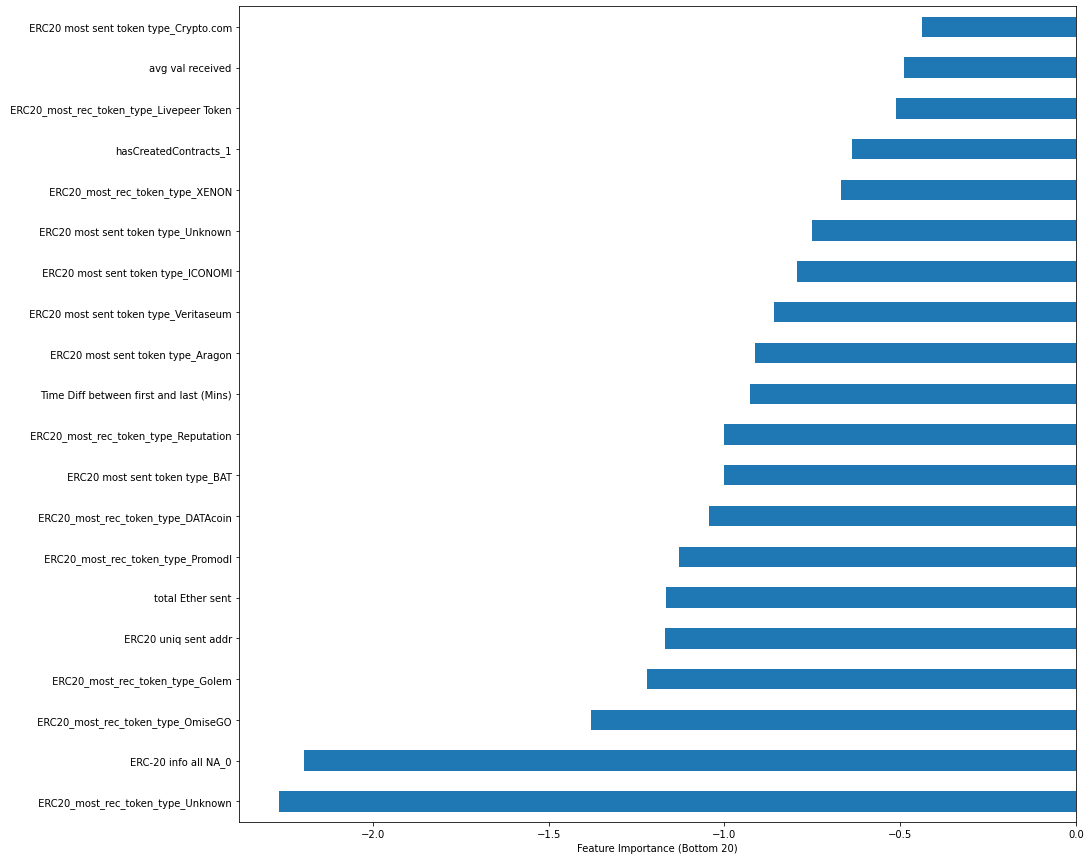

In [93]:
ax = pd.Series(svc.coef_[0], index=X_train.columns).nsmallest(20).plot(kind='barh',figsize=(15,15))

ax.set_xlabel("Feature Importance (Bottom 20)")


Text(0.5, 0, 'Feature Importance (Top 20)')

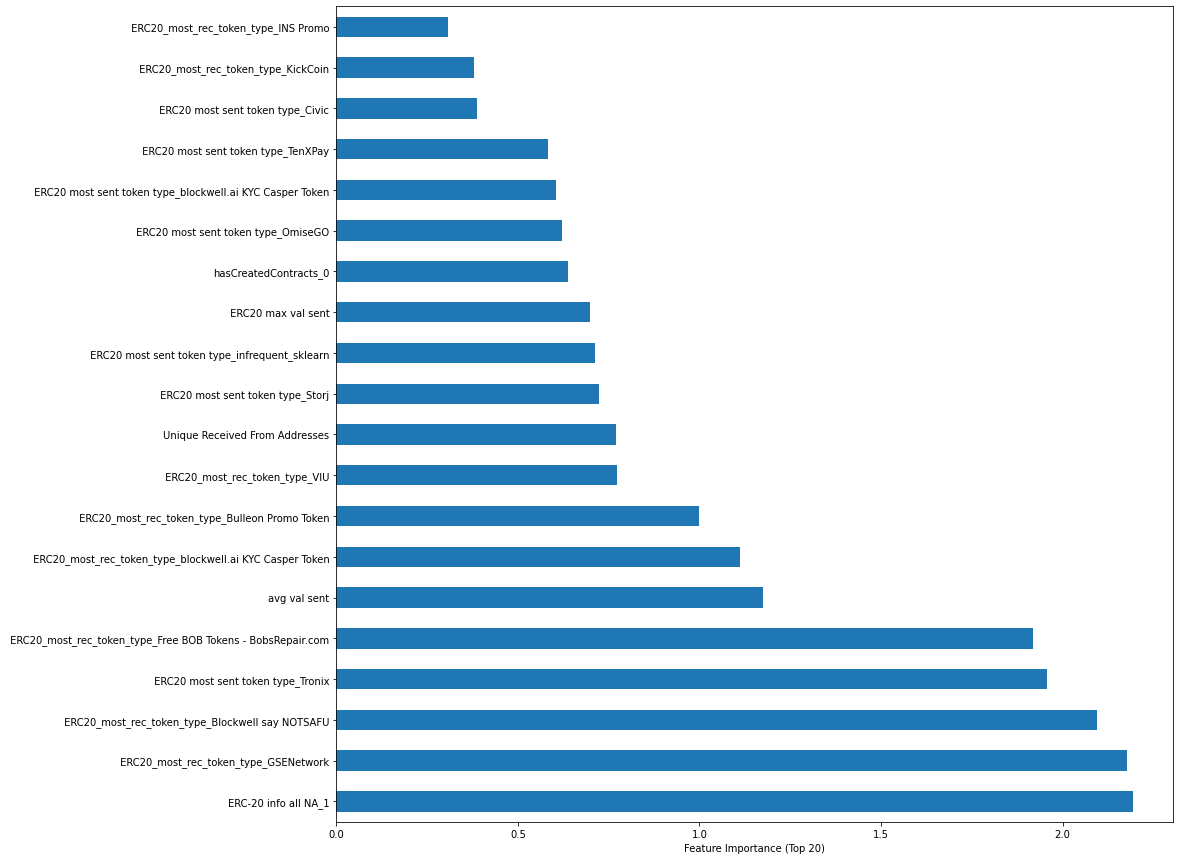

In [94]:
ax = pd.Series(svc.coef_[0], index=X_train.columns).nlargest(20).plot(kind='barh',figsize=(15,15))

ax.set_xlabel("Feature Importance (Top 20)")


### 3) SVC with Gamma = 1  , Kernel = 'linear"


In [95]:
svc = SVC(gamma=1, kernel = 'linear')
svc.fit(X_train, y_train)

SVC(gamma=1, kernel='linear')

0.954533148584825
Threshold value is: 1


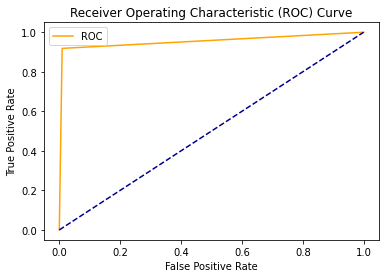

In [96]:
y_scores = svc.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
print(roc_auc_score(y_train, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)


##### 3.1) Compare training and validation results

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      6205
           1       0.97      0.92      0.94      1765

    accuracy                           0.97      7970
   macro avg       0.97      0.95      0.96      7970
weighted avg       0.97      0.97      0.97      7970

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       690
           1       0.96      0.93      0.94       196

    accuracy                           0.98       886
   macro avg       0.97      0.96      0.96       886
weighted avg       0.98      0.98      0.98       886



c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


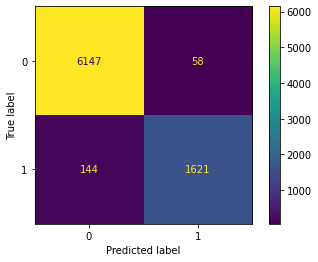

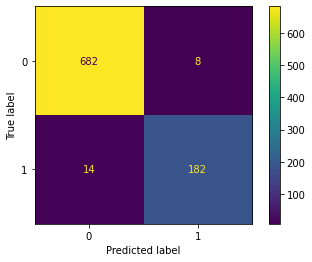

In [97]:
svc_train_pred = svc.predict(X_train)
print(classification_report(y_train, svc_train_pred))
svc_val_pred = svc.predict(X_val)
print(classification_report(y_val, svc_val_pred))

plot_confusion_matrix(svc, X_train, y_train)  # classification_report(y_train, svc_train_pred)
plot_confusion_matrix(svc, X_val, y_val) # confusion_matrix(y_val, svc_val_pred)

### 4) SVC with Gamma = 0.001 , Kernel = 'rbf"

In [98]:
svc = SVC(gamma=0.001, kernel = 'rbf')
svc.fit(X_train, y_train)

SVC(gamma=0.001)

0.9034900575931409
Threshold value is: 1


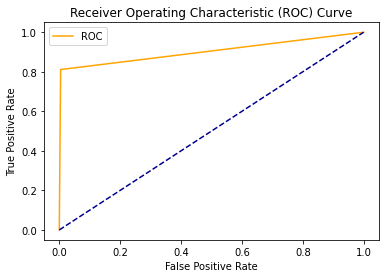

In [99]:
y_scores = svc.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
print(roc_auc_score(y_train, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6205
           1       0.98      0.81      0.89      1765

    accuracy                           0.95      7970
   macro avg       0.97      0.90      0.93      7970
weighted avg       0.96      0.95      0.95      7970

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       690
           1       0.98      0.86      0.92       196

    accuracy                           0.97       886
   macro avg       0.97      0.93      0.95       886
weighted avg       0.97      0.97      0.96       886



c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


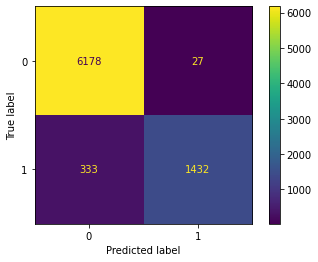

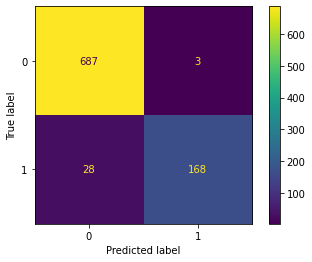

In [100]:
svc_train_pred = svc.predict(X_train)
print(classification_report(y_train, svc_train_pred))
svc_val_pred = svc.predict(X_val)
print(classification_report(y_val, svc_val_pred))

plot_confusion_matrix(svc, X_train, y_train)  # classification_report(y_train, svc_train_pred)
plot_confusion_matrix(svc, X_val, y_val) # confusion_matrix(y_val, svc_val_pred)

### 5) SVC with Gamma = 1 , Kernel = 'rbf"

In [110]:
svc = SVC(gamma=1, kernel = 'rbf')
svc.fit(X_train, y_train)


SVC(gamma=1)

0.9979364169898625
Threshold value is: 1


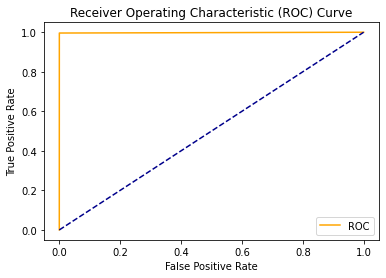

In [111]:
y_scores = svc.predict(X_train)
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
print(roc_auc_score(y_train, y_scores))
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print("Threshold value is:", optimal_threshold)
plot_roc_curve(fpr, tpr)


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      6205
           1       0.99      0.97      0.98      1765

    accuracy                           0.99      7970
   macro avg       0.99      0.98      0.99      7970
weighted avg       0.99      0.99      0.99      7970

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       690
           1       0.98      0.96      0.97       196

    accuracy                           0.99       886
   macro avg       0.98      0.98      0.98       886
weighted avg       0.99      0.99      0.99       886



c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
c:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


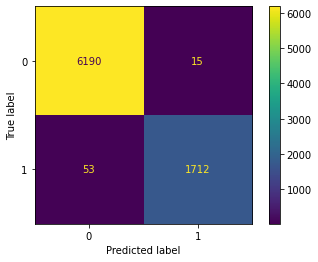

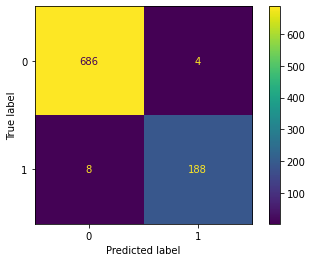

In [109]:
svc_train_pred = svc.predict(X_train)
print(classification_report(y_train, svc_train_pred))
svc_val_pred = svc.predict(X_val)
print(classification_report(y_val, svc_val_pred))

plot_confusion_matrix(svc, X_train, y_train)  # classification_report(y_train, svc_train_pred)
plot_confusion_matrix(svc, X_val, y_val) # confusion_matrix(y_val, svc_val_pred)